# Time/Height 1D Examples

Here are some examples for running the full 1D model in time and in height. When initializing the spectral_1d object, we just need to modify both the $t_{\max}$ parameter and the $z_{\mathrm{top}}$ and $z_{\mathrm{bot}}$ parameters. Also, we'll need to specify what kind of boundary condition we want to use for the top of the domain. Currently there are two options: 1.) 'fixed' (default) and 2.) ```None```. Option 1. uses a fixed boundary condition for the top distribution, i.e., the distribution at $z_{\mathrm{top}}$ is fixed. This can be useful for determining steady-state times (the time it takes to achieve a steady-state that would theoretically be determined by the steady-state model runs). Option 2. is a essentially a "fallout" model where there are no boundary conditions imposed at the top. Eventually all particles will fall out of the domain. This can be useful for simulating, for example, downbursts or microbursts. First, let's try to simulate a simple rainshaft with an instantaneous initial PSD (option 2). To speed things up let's run just using the single moment option.

In [1]:
from binmod1d.spectral_model import spectral_1d

In [4]:
s2_rain = spectral_1d(sbin=2,bins=60,D1=0.01,tmax=800.,output_freq=6.,dt=2.0,Nt0=15.,Dm0=0.8,mu0=0.,dz=20.0,ztop=3000.,zbot=0.,boundary=None,habit_list=['rain'],ptype='rain',kernel='Hydro',Ecol=1.0,Es=0.25,radar=True,dist_var='size',moments=2,rk_order=1)
s2_rain.run()

Running 1D spectral bin model:   0%|          | 0/400 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.52 min


Now let's plot the reflectivity time/height profile for the case using the plot_time_height() method.

(<Figure size 1400x600 with 2 Axes>,
 <Axes: xlabel='Time (seconds)', ylabel='Height (km)'>)

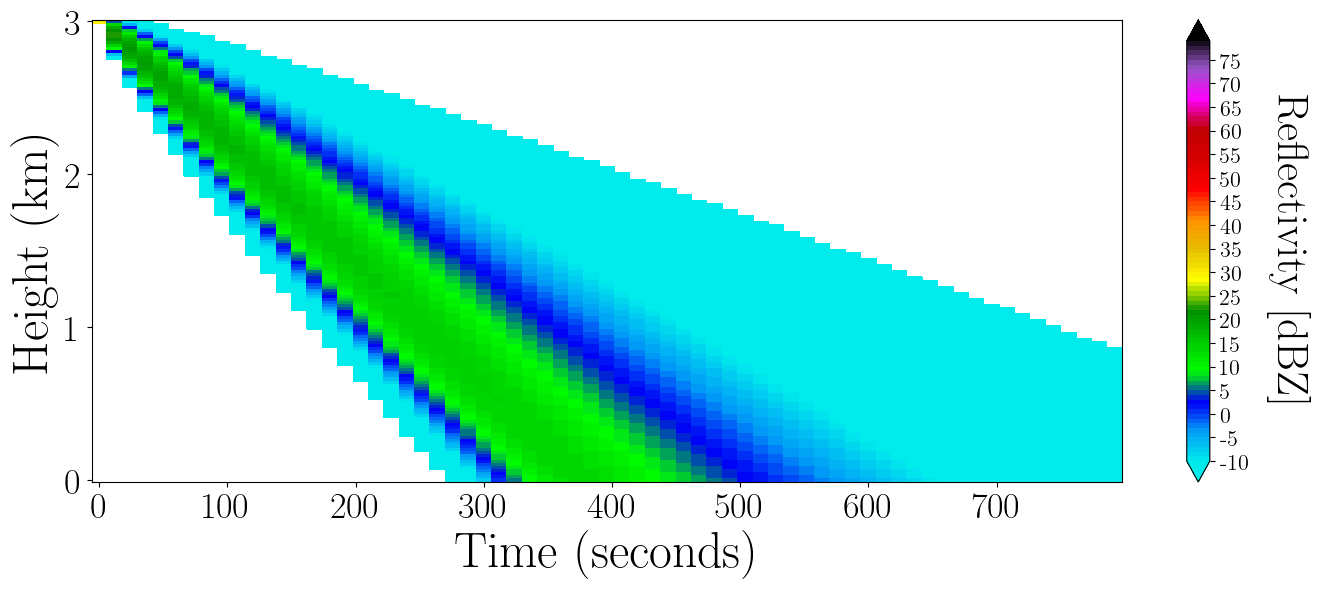

In [5]:
s2_rain.plot_time_height()

We can look at some of the other variables as well including microphysics variables by changing the input option.

(<Figure size 1400x600 with 2 Axes>,
 <Axes: xlabel='Time (seconds)', ylabel='Height (km)'>)

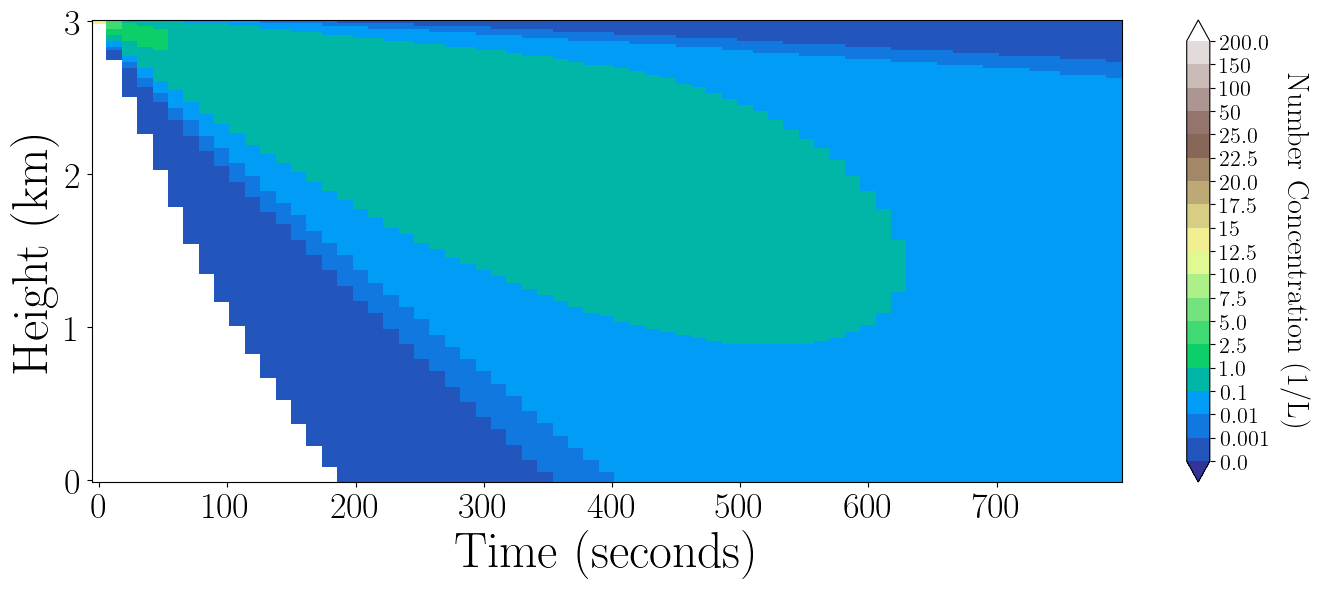

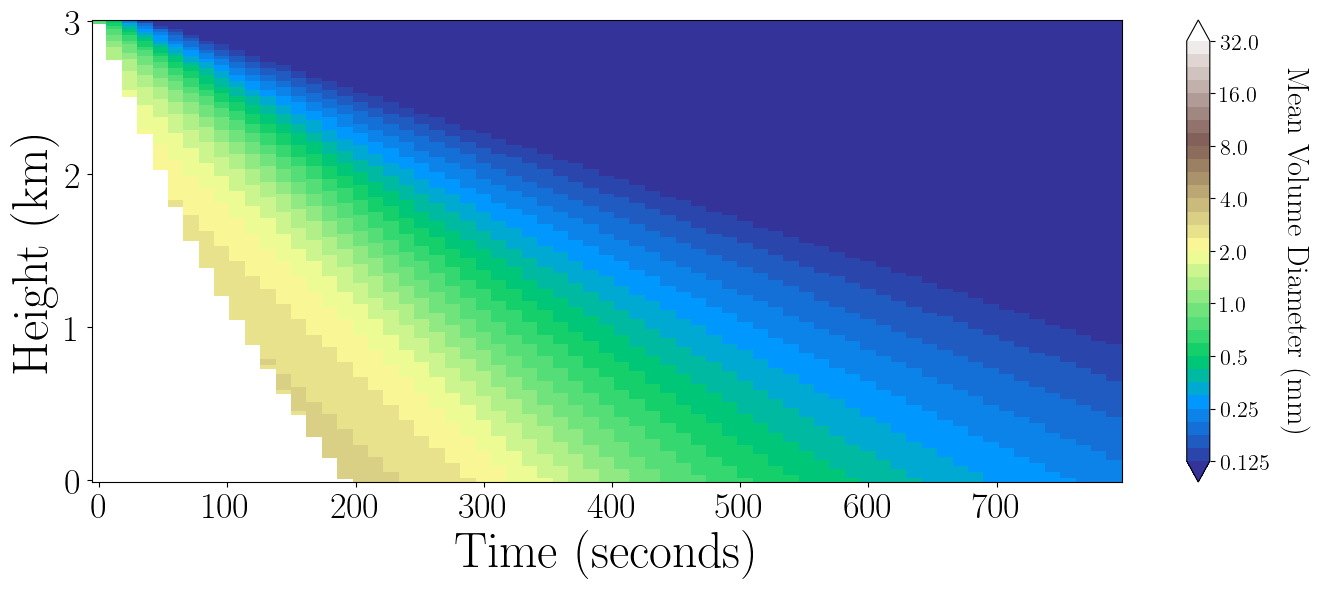

In [6]:
s2_rain.plot_time_height(var='Nt')
s2_rain.plot_time_height(var='Dm')

Now let's try a snow case. We'll fix the boundary condition to the initial gamma distribution and we'll use just one category and 1 moment calculations. Since snowflakes fall slower, let's run the model for 1 and a half hour to reach a quasi steady-state.

In [7]:
s2_snow = spectral_1d(sbin=2,bins=60,D1=0.01,tmax=5400.,output_freq=6.,dt=2.0,Nt0=50.,Dm0=1.25,mu0=0.,dz=20.0,ztop=3000.,zbot=0.,boundary='fixed',habit_list=['snow'],ptype='snow',kernel='Hydro',Ecol=1.0,Es=0.1,Eb=0.,radar=True,dist_var='size',moments=2,rk_order=1)
s2_snow.run()

Running 1D spectral bin model:   0%|          | 0/2700 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 4.42 min


C:\Users\edwin.dunnavan\Documents\Bin_Model\src\binmod1d\spectral_model.py:743: RuntimeWarning: invalid value encountered in sqrt
  rhohv_denom = np.sqrt(zh_tot*zv_tot)
C:\Users\edwin.dunnavan\Documents\Bin_Model\src\binmod1d\spectral_model.py:749: RuntimeWarning: invalid value encountered in sqrt
  rhohv_denom_full = np.sqrt(zh_full*zv_full)


(<Figure size 1400x600 with 2 Axes>,
 <Axes: xlabel='Time (seconds)', ylabel='Height (km)'>)

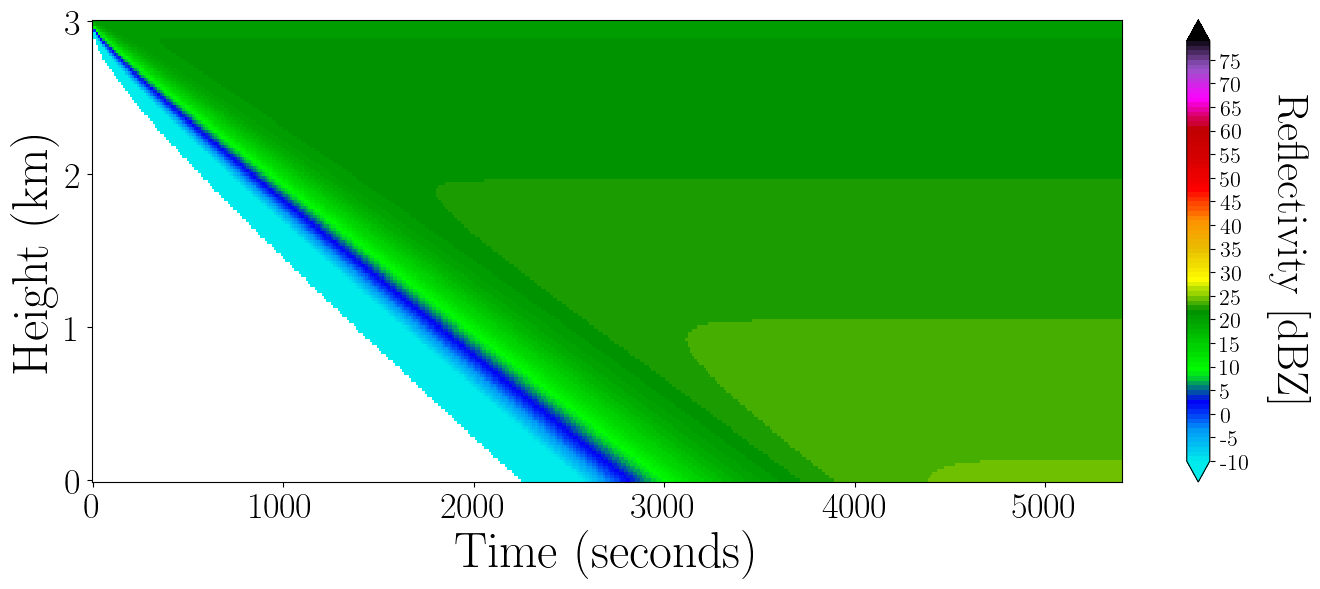

In [8]:
s2_snow.plot_time_height()

Now let's plot some more variables. Let's see what the polarimetric variables look like.

(<Figure size 1400x600 with 2 Axes>,
 <Axes: xlabel='Time (seconds)', ylabel='Height (km)'>)

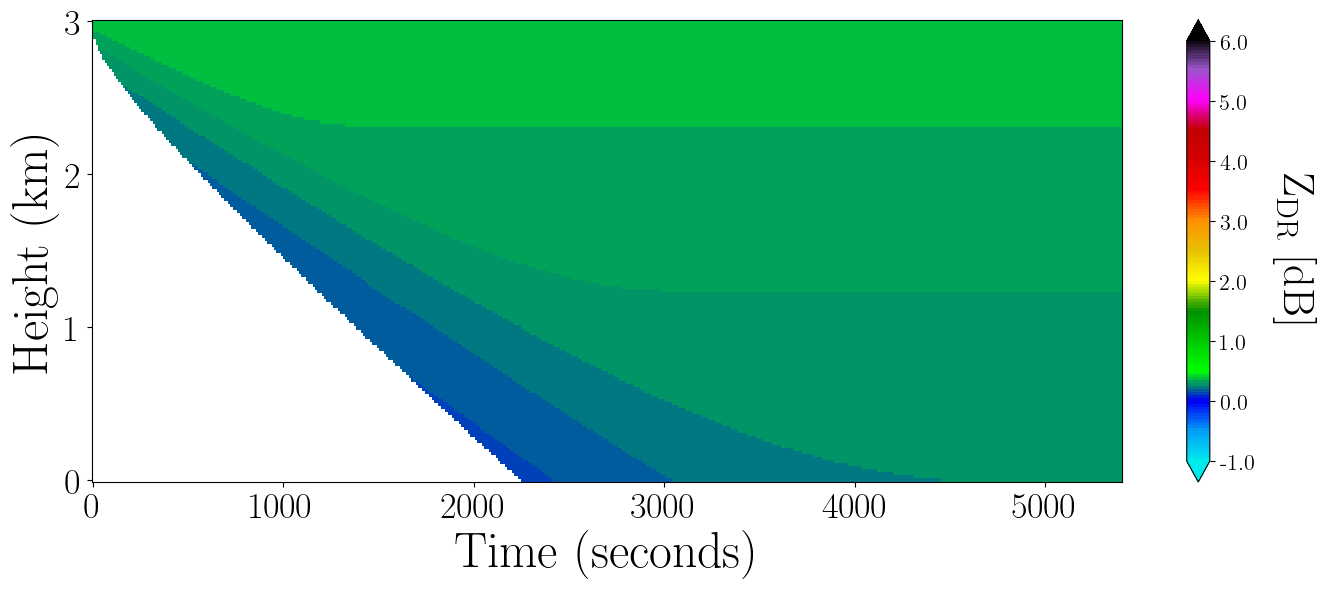

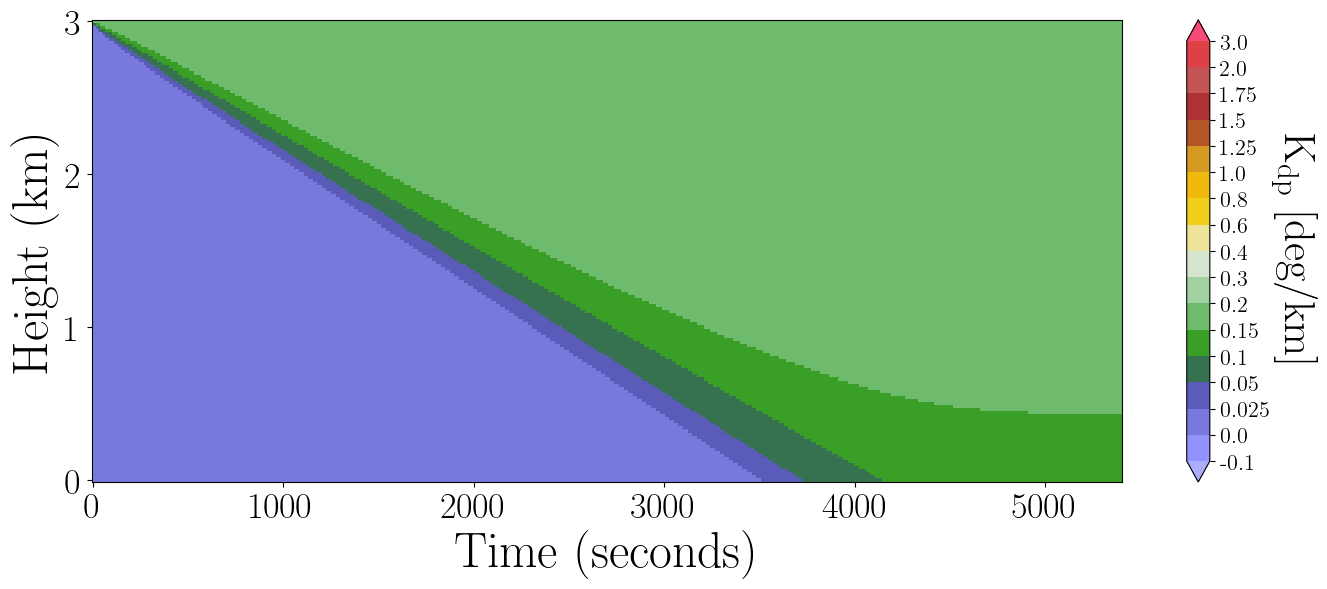

In [9]:
s2_snow.plot_time_height(var='ZDR')
s2_snow.plot_time_height(var='KDP')

We can also run the model in the steady-state mode and use the plot_dists_height() method to compare the quasi steady-state distributions at each 1 km height with the steady-state result.

Running 1D spectral bin model:   0%|          | 0/150 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 0.01 min


(<Figure size 600x1000 with 4 Axes>,
 array([<Axes: title={'center': 'Height = 3.0 km'}, ylabel='n(D) (1/cm$^{3}$ 1/mm)'>,
        <Axes: title={'center': 'Height = 2.0 km'}, ylabel='n(D) (1/cm$^{3}$ 1/mm)'>,
        <Axes: title={'center': 'Height = 1.0 km'}, ylabel='n(D) (1/cm$^{3}$ 1/mm)'>,
        <Axes: title={'center': 'Height = 0.0 km'}, xlabel='Equivolume Diameter (mm)', ylabel='n(D) (1/cm$^{3}$ 1/mm)'>],
       dtype=object))

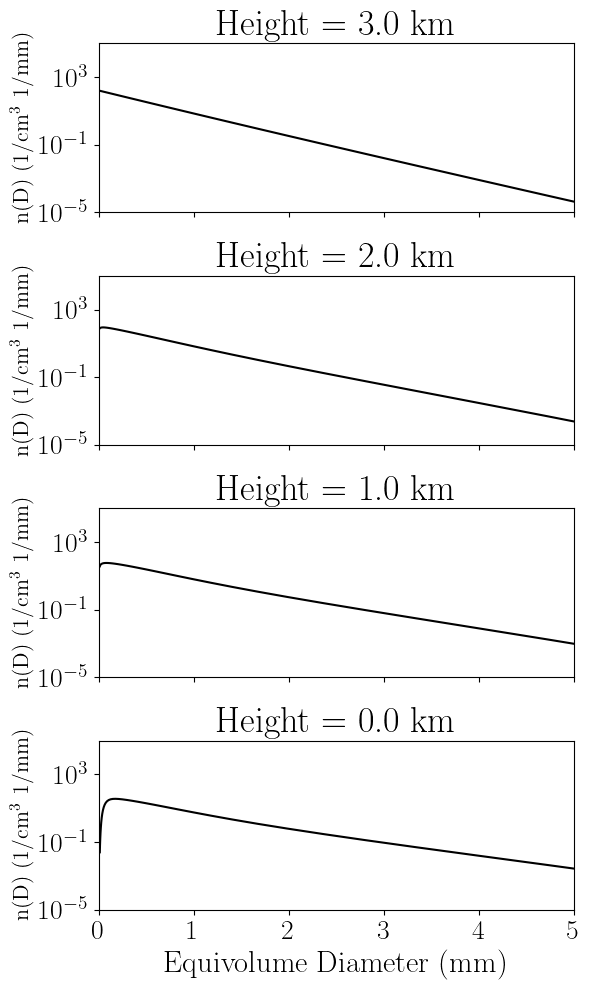

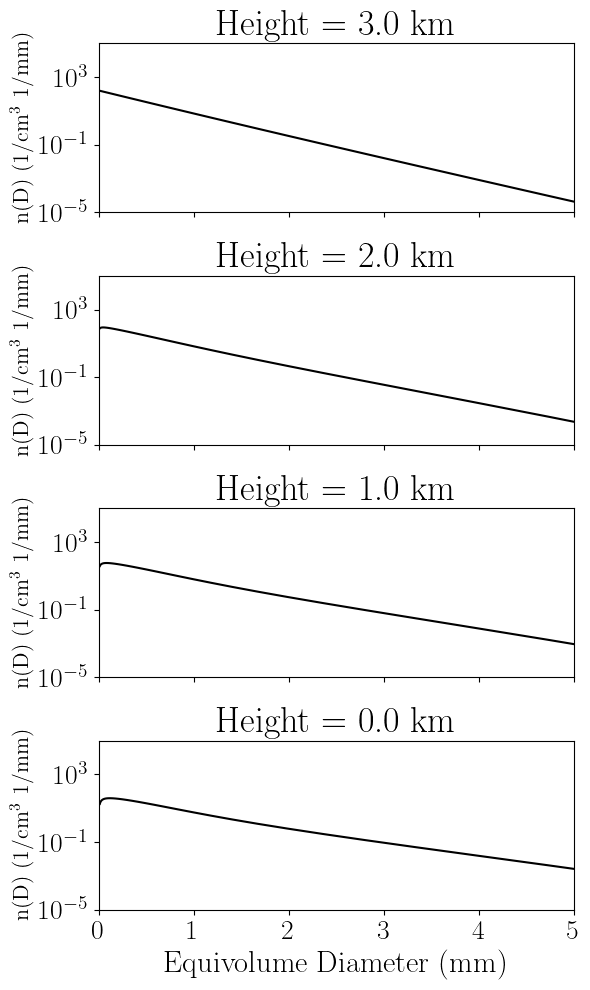

In [15]:
s2_snow_SS = spectral_1d(sbin=2,bins=60,D1=0.01,tmax=0.,output_freq=1.,dt=2.0,Nt0=50.,Dm0=1.25,mu0=0.,dz=20.0,ztop=3000.,zbot=0.,boundary='fixed',habit_list=['snow'],ptype='snow',kernel='Hydro',Ecol=1.0,Es=0.1,Eb=0.,radar=True,dist_var='size',moments=2,rk_order=1)
s2_snow_SS.run()
s2_snow.plot_dists_height(tind=-1)
s2_snow_SS.plot_dists_height()

We can also compare the final height profiles of the microphysical and radar variables from the model and compare with the steady-state solution using the plot_moments_radar() method.

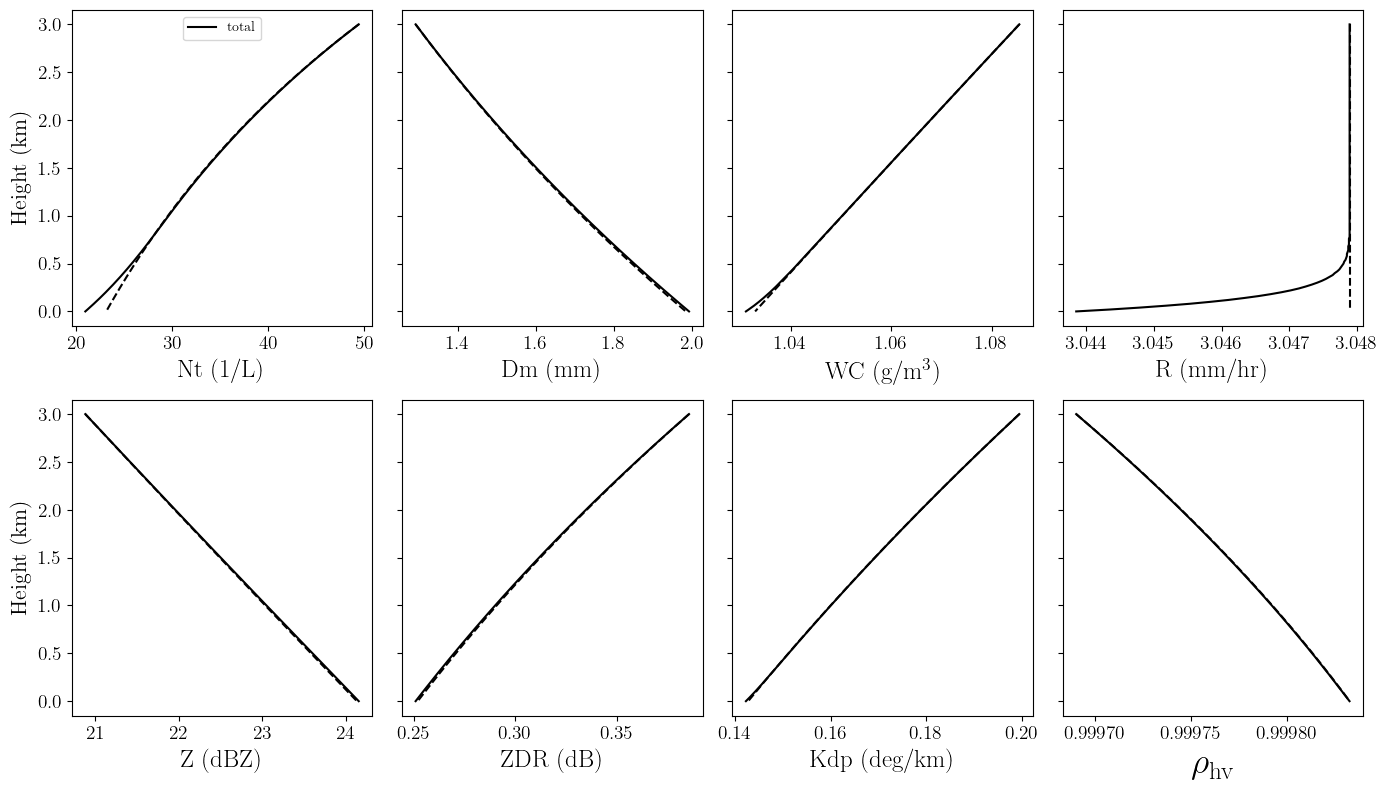

In [19]:
fig, ax = s2_snow.plot_moments_radar()
s2_snow_SS.plot_moments_radar(ax=ax,lstyle='--')

Notice that the full model is very close to the steady-state solution. However the mass flux (i.e., precipitation rate) decreases slightly in the lowest kilometer.

Finally, we can simulate a snowstorm case with both aggregation and collisional breakup. Let's just run from 3.0 km to 2.0 km to speed things up. 

In [20]:
s2_snow_breakup_2cat = spectral_1d(sbin=2,bins=60,D1=0.001,tmax=3600.,output_freq=6.,dt=2.0,Nt0=50.,Dm0=1.25,mu0=0.,dz=20.0,ztop=3000.,zbot=2000.,boundary='fixed',habit_list=['snow','fragments'],ptype='snow',kernel='Hydro',Ecol=0.5,Es=0.6,Eb=0.002,radar=True,dist_num=2,cc_dest=1,br_dest=2,dist_var='size',moments=1,rk_order=1)
s2_snow_breakup_2cat.run()

Running 1D spectral bin model:   0%|          | 0/1800 [00:00<?, ?it/s]

Model Complete! Time Elapsed = 1.16 min


Now let's look at the plots.

(<Figure size 600x1000 with 2 Axes>,
 array([<Axes: title={'center': 'Height = 3.0 km'}, ylabel='n(D) (1/cm$^{3}$ 1/mm)'>,
        <Axes: title={'center': 'Height = 2.0 km'}, xlabel='Equivolume Diameter (mm)', ylabel='n(D) (1/cm$^{3}$ 1/mm)'>],
       dtype=object))

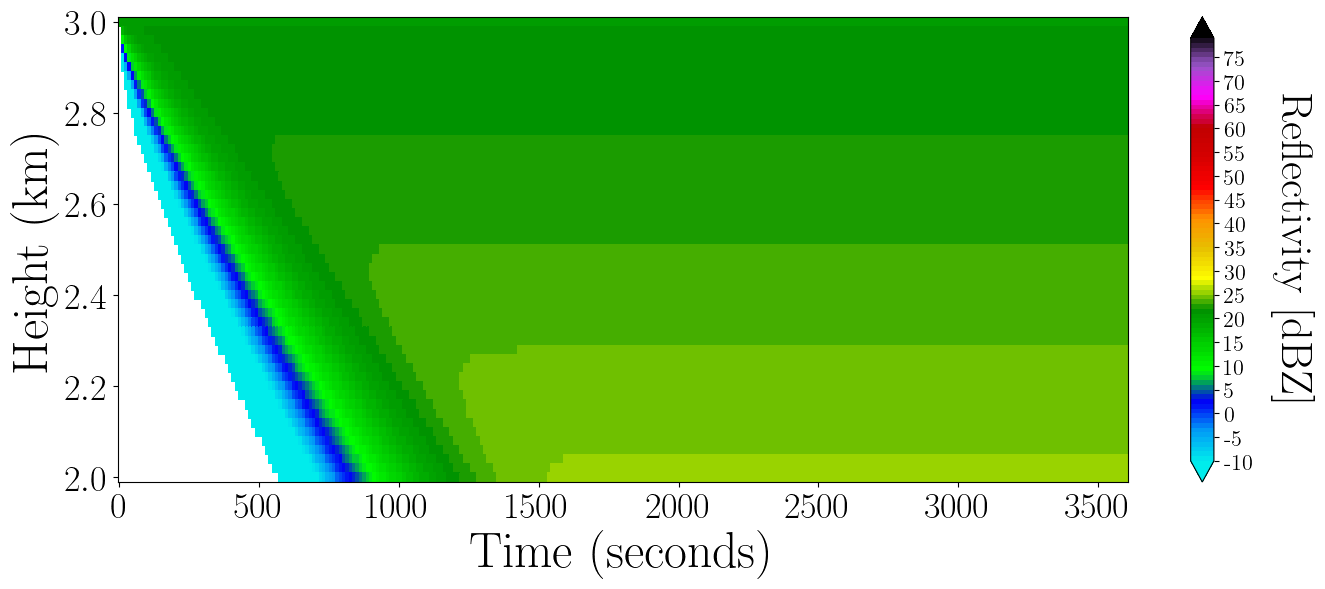

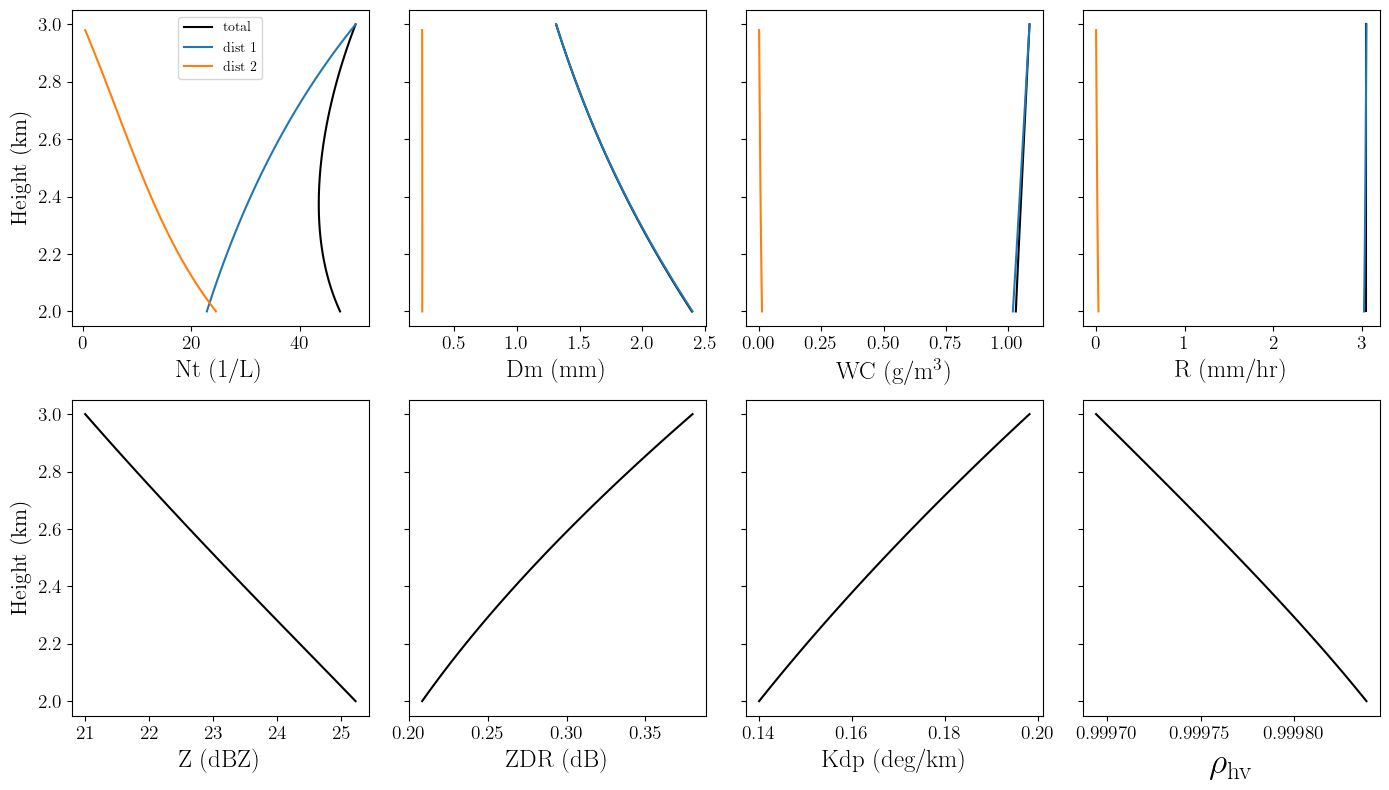

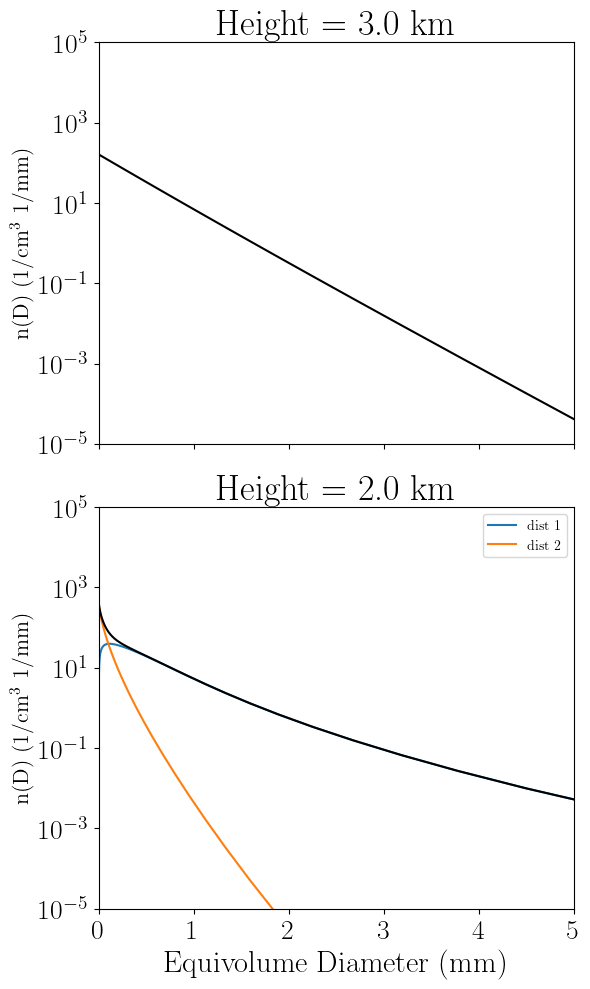

In [21]:
s2_snow_breakup_2cat.plot_time_height()
s2_snow_breakup_2cat.plot_moments_radar(plot_habits=True)
s2_snow_breakup_2cat.plot_dists_height(plot_habits=True)

Plotting distributions...


(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='dN/dlog(D)'>,
        <Axes: xlabel='log(D) [log(mm)]', ylabel='dM/dlog(D)'>],
       dtype=object))

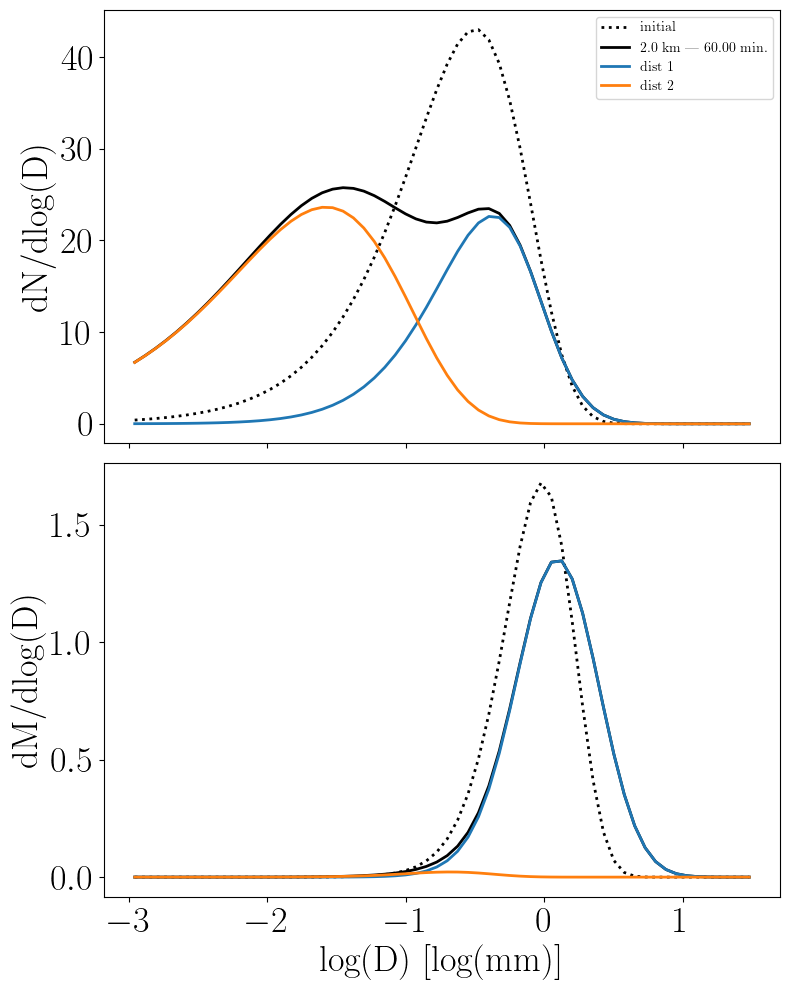

In [22]:
s2_snow_breakup_2cat.plot_dists(plot_habits=True,x_axis='size')